In [17]:
from core.finance.context import Context
import numpy as np, math
import matplotlib.pyplot as plt

def do_compute_classical(a, s_dim, t_dim):
    c = np.diag(np.zeros(s_dim, dtype=np.complex))
    for j in range(0, s_dim):
        for k in range(0, s_dim):
            for t in range(0, t_dim):
                c[j][k] = c[j][k] + a[j][t] * a[k][t]
    r = 0
    for v in np.linalg.eigvalsh(c):
        if v < 0:
            continue
        r = r - v * math.log(v)
    return r


Apr 01, 2008 0.7006323888199553
May 01, 2008 0.39511719039563525
Jun 02, 2008 0.3072772556378076
Jul 01, 2008 0.7187836461715323
Aug 01, 2008 0.6130990659524284
Sep 02, 2008 0.7855277253158046
Oct 01, 2008 0.5847785729755705
Nov 03, 2008 0.6973227937662709
Apr 01, 2008 0.9045517916338455
May 01, 2008 0.6865747215718696
Jun 02, 2008 0.7043742939415131
Jul 01, 2008 0.7423629823262952
Aug 01, 2008 0.6756621832323378
Sep 02, 2008 0.7770590381668665
Oct 01, 2008 0.7405460100774128
Nov 03, 2008 0.8945368655751971


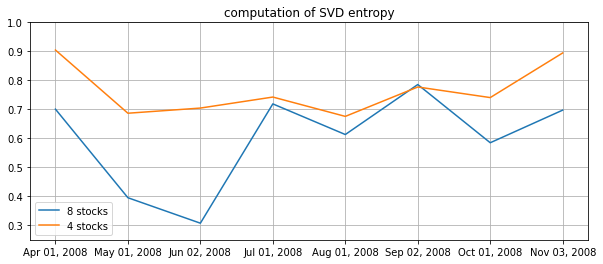

In [18]:
c = Context()
usecase = c.get_coefficient_usecase()
repository = c.get_coefficient_repository()
plt.figure(figsize=(10,4))
plt.title("computation of SVD entropy")
plt.grid()
plt.ylim([0.25, 1.0])

ticks = ["XOM", "WMT", "PG", "MSFT",
         "GE", "T", "JNJ", "CVX"]
dates = []
indices = []
values = []
for index in range(0, 8):
    coefficient = usecase.load(5, index, ticks)
    date = repository.get_date(index)
    indices.append(index)
    dates.append(date)
    value = do_compute_classical(coefficient, len(ticks), 4)
    values.append(value)
    print(date, value)
plt.plot(dates, values, label="8 stocks")

ticks = ["XOM", "WMT", "PG", "MSFT"]
dates = []
indices = []
values = []
for index in range(0, 8):
    coefficient = usecase.load(5, index, ticks)
    date = repository.get_date(index)
    indices.append(index)
    dates.append(date)
    value = do_compute_classical(coefficient, len(ticks), 4)
    values.append(value)
    print(date, value)
plt.plot(dates, values, label="4 stocks")
plt.legend()
plt.savefig("../reports/images/entropy-compare.pdf")